---
title: "odds and log likelihood"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

## the scenario

Imagine we are researchers studying a potential link between a specific mutated gene and a certain disease. We have collected data from a sample of 356 people.

Here's our data:

| | **Has Disease** | **No Disease** |
| :--- | :---: | :---: |
| **Has Mutated Gene** | 23 | 117 |
| **No Mutated Gene** | 6 | 210 |

Our goal is to figure out how finding this mutated gene in a person should change our belief about whether they have the disease.

## prior

The **prior probability** of someone having the disease is the chance of having the disease before we know anything about their gene status. We can calculate this from our data.

$$
P(\text{Disease}) = \frac{\text{Number of people with the disease}}{\text{Total number of people}}
$$

From our table:
$$
P(\text{Disease}) = \frac{23 + 6}{23 + 117 + 6 + 210} = \frac{29}{356} \approx 0.081
$$

## odds

Odds are a different way to express the same information. Odds compare the chance of an event happening to the chance of it *not* happening.

$$
\text{Odds} = \frac{P(\text{event})}{P(\text{not event})}
$$

In our case, "event" is having the disease. Because we have only two choices, the probability of not having the disease is simply $1 - P(\text{Disease})$, therefore:

$$
\text{Odds(Disease)} = \frac{P(\text{Disease})}{1 - P(\text{Disease})}
$$

Plugging in the numbers:

$$
\text{Odds(Disease)} = \frac{29/356}{1 - 29/356} \approx 0.0887 \approx \frac{1}{11}
$$

This means that for every person with the disease, about 11 do not have it.

### log odds
The **log odds** is simply the natural logarithm of the odds.

$$
\text{Log Odds} = \ln\left(\frac{P}{1-P}\right)
$$

We will see soon enough why this is useful. For now, let's point out that:

* if the odds are 1 (meaning a 50/50 chance), the log odds is 0.
* if the odds are greater than 1 (more likely than not), the log odds is positive.
* if the odds are less than 1 (less likely than not), the log odds is negative.
* the log odds have a symmetric shape around $p=1/2$, see figure below.

For our example, the log odds of having the disease is:

$$
\text{Log Odds(Disease)} = \ln(\text{Odds(Disease)}) = \ln(0.0887) \approx -2.42
$$


In [5]:
#| code-summary: "import libraries"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.5)

/var/folders/cn/m58l7p_j6j10_4c43j4pd8gw0000gq/T/ipykernel_10104/1581004145.py:5: RuntimeWarning: divide by zero encountered in divide
  odds = p / (1 - p)
/var/folders/cn/m58l7p_j6j10_4c43j4pd8gw0000gq/T/ipykernel_10104/1581004145.py:19: RuntimeWarning: divide by zero encountered in log
  ax[1].plot(p, np.log(odds), label="odds", color="tab:blue")


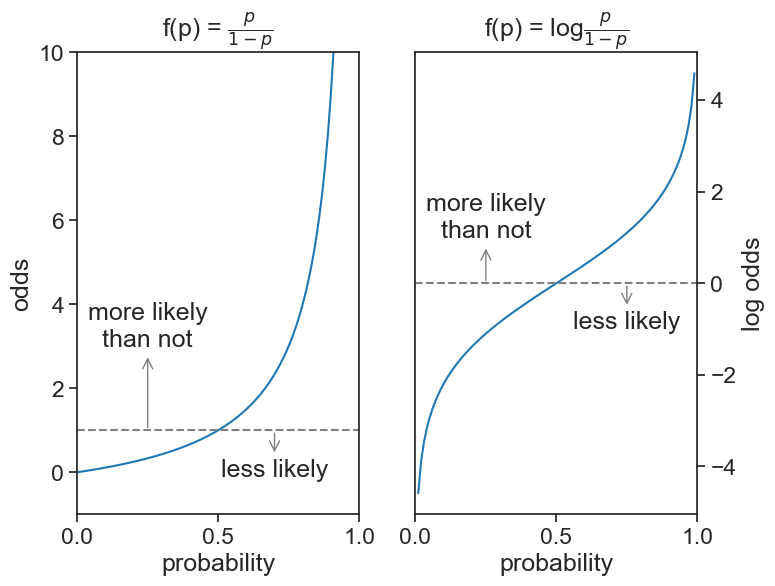

In [33]:
#| code-summary: "visualize"
fig, ax = plt.subplots(1, 2, figsize=(8, 6))

p = np.linspace(0, 1, 100)
odds = p / (1 - p)
ax[0].plot(p, odds, label="odds", color="tab:blue");
ax[0].axhline(1, ls="--", color="gray")
ax[0].set(ylabel="odds",
          xlabel="probability",
          title=r"f(p) = $\frac{p}{1-p}$",
          ylim=(-1, 10),
          xlim=(0, 1),
          xticks=[0,0.5,1]);
ax[0].annotate("more likely\nthan not", xy=(0.25, 1), xytext=(0.25, 3),
               ha="center", arrowprops=dict(arrowstyle="<-", color="gray"))
ax[0].annotate("less likely", xy=(0.7, 1), xytext=(0.7, -0.1),
               ha="center", arrowprops=dict(arrowstyle="<-", color="gray"))

ax[1].plot(p, np.log(odds), label="odds", color="tab:blue")
ax[1].axhline(0, ls="--", color="gray")
ax[1].yaxis.set_ticks_position('right')
ax[1].yaxis.set_label_position('right')
ax[1].set(ylabel="log odds",
          xlabel="probability",
          title=r"f(p) = log$\frac{p}{1-p}$",
          xlim=(0, 1),
          xticks=[0,0.5,1]);
ax[1].annotate("more likely\nthan not", xy=(0.25, 0), xytext=(0.25, 1),
               ha="center", arrowprops=dict(arrowstyle="<-", color="gray"))
ax[1].annotate("less likely", xy=(0.75, 0), xytext=(0.75, -1),
               ha="center", arrowprops=dict(arrowstyle="<-", color="gray"));

## Bayes' theorem in odds form

The standard form of Bayes' theorem is:

$$
P(H|E) = \frac{P(E|H) \cdot P(H)}{P(E)}.
\tag{1}
$$

In our example, the hypothesis $H$ is "having the disease", and the evidence $E$ is detecting the mutated gene.

Let's write Bayes' theorem for the alternative hypothesis $\neg H$ ("not having the disease"):

$$
P(\neg H|E) = \frac{P(E|\neg H) \cdot P(\neg H)}{P(E)}.
\tag{2}
$$

The **odds form** of Bayes' theorem is the ratio of these two equations:

$$
\underbrace{\frac{P(H|E)}{P(\neg H|E)}}_ {\text{posterior odds}} = \underbrace{\frac{P(E|H)}{P(E|\neg H)}}_{\text{likelihood ratio}} \cdot \underbrace{\frac{P(H)}{P(\neg H)}}_{\text{prior odds}}
\tag{3}
$$

We already discussed the prior odds. The posterior odds represent the odds of having the desease *after* we have seen the evidence (the mutated gene). The new piece we need is the **likelihood ratio**.

## likelihood ratio

The likelihood ratio (LR) tells us how much more likely we are to see the evidence if the hypothesis is true compared to if it is false.

$$
\text{LR} = \frac{P(E|H)}{P(E|\neg H)}
$$

We can compute this from our data:

* $P(E|H)$: the probability of having the mutated gene given that the person has the disease. From the left column in our table, this is $\frac{23}{23+6} \approx 0.793$.
* $P(E|\neg H)$: the probability of having the mutated gene given that the person does not have the disease. From the right column in our table, this is $\frac{117}{117+210} \approx 0.358$.

Finally:

$$
\text{LR} = \frac{23/29}{117/327} \approx 2.22
$$

The interpretation is that seeing the mutated gene is about 2.22 times more likely if the person has the disease than if they do not.

## log likelihood ratio

Here too, taking the logarithm transforms a quantity between 0 and infinity into a number between negative infinity and positive infinity. The log likelihood ratio is:
$$
\text{Log-LR} = \ln(\text{LR}) = \ln(2.22) \approx 0.797
$$

The fact that this is a positive number says that seeing the mutated gene **increases** our belief that the person has the disease.

## Bayes' theorem in log odds form

Taking the logarith of Eq. (3) gives us the log odds form of Bayes' theorem:

$$
\underbrace{\ln\left(\frac{P(H|E)}{P(\neg H|E)}\right)}_{\text{posterior log odds}} = \underbrace{\ln\left(\frac{P(E|H)}{P(E|\neg H)}\right)}_{\text{log-likelihood ratio}} + \underbrace{\ln\left(\frac{P(H)}{P(\neg H)}\right)}_{\text{prior log odds}}
\tag{4}
$$

Plugging in our numbers, we can see how our belief about the person having the disease changes after seeing the evidence (the mutated gene).

\begin{align*}
\text{Posterior Log Odds} &= \text{Log-LR} + \text{Prior Log Odds} \\
&= 0.797 + (-2.42) \\
&\approx -1.623
\end{align*}

From the posterior log odds, we can get back to the posterior odds by exponentiating:

$$
\text{Posterior Odds} = e^{\text{Posterior Log Odds}} = e^{-1.623} \approx 0.197
$$

Finally, we can convert the posterior odds back to a probability:
$$
P(H|E) = \frac{\text{Posterior Odds}}{1 + \text{Posterior Odds}} = \frac{0.197}{1 + 0.197} \approx 0.164
$$
This means that after seeing the mutated gene, our estimate of the probability that the person has the disease has increased from about 8.1% to about 16.4%.